In [204]:
import pandas as pd 
from datetime import timedelta

# Import files 
f1=open('takehome_users.csv','r')
user=pd.read_csv(f1)
f1.close()

f2=open('takehome_user_engagement.csv','r')
engagement=pd.read_csv(f2)
f2.close()

user.head()



,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [205]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [206]:
user.info()
print('\n')
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In the "user" dataframe, there are 2 columns "last_session_creation_time" and "invited_by_user_id" that are missing values. "Engagement" dataframe doesnt contain any column that have missing values.  Also, " creation_time" and 'time_stamp" columns should be in the datetime format instead of object. Therefore, it needs to convert to datetime format. 

In [207]:
# Convert time column to right format

user['creation_time']=pd.to_datetime(user['creation_time'])

engagement['time_stamp']=pd.to_datetime(engagement['time_stamp'])

user.info()
print('\n')
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 M

In [208]:
# This section is to find the the id for user who is considered to be "adopted_user"
user_id=engagement['user_id'].unique()
adopted_user=[]

for i_d in user_id:
    temp_df=engagement[engagement['user_id']==i_d]
    i=0
    
    while i < len(temp_df):
        t=temp_df.iloc[i]
        
        no_visit=temp_df[(temp_df.time_stamp >= t.time_stamp) & (temp_df.time_stamp < (t.time_stamp + timedelta(days=7)))]['visited'].sum()
        
        if no_visit>=3:
            adopted_user.append(i_d)
            i=len(temp_df)
            
        i+=1
        


In [209]:
# To add 0 or 1 to the new column "adopted" to indicate whether a user is adopted or not.
user['adopted'] = user.object_id.apply(lambda x: 1 if x in adopted_user else 0)


In [210]:
user.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.0+ MB


In [211]:
from sklearn.preprocessing import LabelEncoder


# creating instance of labelencoder. Hot Encoding object and Boolean column 
labelencoder = LabelEncoder()
user['creation_source'] = labelencoder.fit_transform(user['creation_source'])
user['email'] = labelencoder.fit_transform(user['email'])

# Fill NA values
user['last_session_creation_time'].fillna(user['last_session_creation_time'].median(), inplace=True)
# Dropped 'invited_by_user_id' because the column missed about halft of the data
user.drop(['invited_by_user_id'], axis=1, inplace=True)

# turn other fields into datetime object  
user.creation_time = pd.to_datetime(user['creation_time'])

user['creation_day'] = user['creation_time'].apply(lambda x: x.dayofweek)
user['creation_month'] = user['creation_time'].apply(lambda x: x.month)
user['creation_year'] = user['creation_time'].apply(lambda x: x.year)
user['creation_hour'] = user['creation_time'].apply(lambda x: x.hour)


user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null int32
creation_source               12000 non-null int32
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
adopted                       12000 non-null int64
creation_day                  12000 non-null int64
creation_month                12000 non-null int64
creation_year                 12000 non-null int64
creation_hour                 12000 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(2), int64(9), object(1)
memory usage: 1.2+ MB


In [212]:
# To split user dataframe into features and target 
target=user['adopted']
features=user.drop(['adopted','creation_time','name','email'],axis=1)

#target.head()
features.head()

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_day,creation_month,creation_year,creation_hour
0,1,0,1.398139e+09,1,0,11,1,4,2014,3
1,2,1,1.396238e+09,0,0,1,4,11,2013,3
2,3,1,1.363735e+09,0,0,94,1,3,2013,23
3,4,0,1.369210e+09,0,0,1,1,5,2013,8
4,5,0,1.358850e+09,0,0,193,3,1,2013,10


In [213]:
from collections import Counter

counter=Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage= %.2f%%' % (k, v, per))
    

Class=0, Count=10398, Percentage= 86.65%
Class=1, Count=1602, Percentage= 13.35%


From the class distribution shown above, this data is highly imbalanced. Therefore, it's good to explore different machine learning models with different sampling techniques to see if we can get the best result. 

In [217]:
# To scale the data


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scale=StandardScaler()
scale.fit(features)
features_scale=scale.transform(features)


features_scale=pd.DataFrame(features_scale)


features_scale.columns=features.columns

x_train,x_test,y_train,y_test=train_test_split(features_scale,target,test_size=0.3, random_state=8,stratify=target)

In [221]:
# Base Case Performance 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np  

def evaluate_model_baseline(x, y, model):
    no_split=10
    no_repeat=3
    rkf = RepeatedStratifiedKFold(n_splits=no_split, n_repeats=no_repeat, random_state=123)
    score=list()

    for train_idx, val_idx in rkf.split(x,y): 
        x_train,x_val=x.iloc[train_idx],x.iloc[val_idx]
        y_train,y_val=y.iloc[train_idx],y.iloc[val_idx]
        
        
        # model=LogisticRegression(solver='newton-cg',multi_class='multinomial',max_iter=200)
        model.fit(x_train,y_train)
        
        val_preds=model.predict(x_val)
        score.append(f1_score(y_val, val_preds, average='macro'))
        
        
        ave_f1score=np.mean(score)
        
        
    return model,score  

rf = RandomForestClassifier()

m,scores=evaluate_model_baseline(x_train, y_train, rf)

train_score=np.average(scores)

test_pred_baseline=m.predict(x_test)
test_score_bs=(f1_score(test_pred_baseline,y_test,average='macro'))

print(classification_report(test_pred_baseline,y_test))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3198
           1       0.79      0.94      0.86       402

    accuracy                           0.96      3600
   macro avg       0.89      0.95      0.92      3600
weighted avg       0.97      0.96      0.97      3600



In [231]:
# This section presents different algorithms and their performance with the data 


from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


def get_model(): 
    
    models,names=list(), list()
    
    # # Logistic Regression 
    models.append(LogisticRegression(solver='newton-cg',multi_class='multinomial',max_iter=200))    
    names.append('LR')
    
    # # Random Forest
    models.append(RandomForestClassifier(n_estimators=500))
    names.append('RF')
    
    # # Extreme Gradient Boosting Classifier (XGBoost)
    models.append(XGBClassifier())
    names.append('XGB')
       
    models.append( DecisionTreeClassifier())
    names.append('CART')
    
    models.append(GaussianNB())
    names.append('Naive Bayesian')
    
    models.append(SVC())
    names.append('SVC')   
    
    # models.append(get_stacking())
    # names.append('Ensemble')
    
    
    return models, names


def evaluate_model_baseline(x, y, model):
    no_split=10
    no_repeat=3
    rkf = RepeatedStratifiedKFold(n_splits=no_split, n_repeats=no_repeat, random_state=123)
    score=list()

    for train_idx, val_idx in rkf.split(x,y): 
        x_train,x_val=x.iloc[train_idx],x.iloc[val_idx]
        y_train,y_val=y.iloc[train_idx],y.iloc[val_idx]
        
        
        # model=LogisticRegression(solver='newton-cg',multi_class='multinomial',max_iter=200)
        model.fit(x_train,y_train)
        
        val_preds=model.predict(x_val)
        score.append(f1_score(y_val, val_preds, average='macro'))
        
        
        ave_f1score=np.mean(score)
        
        
    return model,score

In [232]:
# Base model 
models,names=get_model()

# pipeline=Pipeline(steps=['Models', model])
score_baseline=list()

test_score_baseline=list()
model_baseline=list()


for i in range (len(models)):
    model_baseline, score=evaluate_model_baseline(x_train,y_train,models[i])
    
    for scr in score: 
        score_baseline.append(scr)

    test_preds_baseline=model_baseline.predict(x_test)
    
    test_score_baseline.append(f1_score(test_preds_baseline, y_test,average='macro' ))
    
    
    print('Algorithm ', names[i])
    print(classification_report(test_preds_baseline, y_test))



Algorithm  LR
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3303
           1       0.61      0.98      0.75       297

    accuracy                           0.95      3600
   macro avg       0.80      0.96      0.86      3600
weighted avg       0.97      0.95      0.95      3600

Algorithm  RF
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3201
           1       0.78      0.94      0.85       399

    accuracy                           0.96      3600
   macro avg       0.88      0.95      0.91      3600
weighted avg       0.97      0.96      0.96      3600

Algorithm  XGB
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3176
           1       0.82      0.93      0.88       424

    accuracy                           0.97      3600
   macro avg       0.91      0.95      0.93      3600
weighted avg       0.97      0.

Text(0.5, 1.0, 'Macro F1-Score for Different Alogorithms')

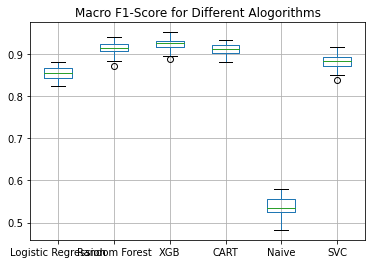

In [236]:
no_split=10
no_repeat=3

import matplotlib.pyplot as plt


def plot_result(score,n_list): 
    
    temp = [score[i * n_list:(i + 1) * n_list] for i in range((len(score) + n_list - 1) // n_list )]  
    
    # size=np.size(temp,0)
    lr=temp[0]
    rf=temp[1]
    xgb=temp[2]
    cart=temp[3]
    naive=temp[4]
    svc=temp[5]
    

    d={'Logistic Regression':lr, 'Random Forest': rf, 'XGB':xgb,
       'CART':cart,'Naive':naive,'SVC':svc,}
    result=pd.DataFrame(d)
        
    return result 
result_baseline =plot_result(score_baseline,no_repeat*no_split)

result_baseline_avg=result_baseline.mean(axis=0)
result_baseline.boxplot()
plt.title('Macro F1-Score for Different Alogorithms')

From the plot above, Random Forest, XGB and CART algorithms are the best three models. It can be further fine-tune to get more optimized results. 